In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


dataset = pd.read_csv('/content/framingham.csv')
dataset.head()


,age,cigsPerDay,totChol,diaBP,BMI,heartRate,glucose,heart disease
0,39,0,195,70.0,26.97,80,77,0
1,46,0,250,81.0,28.73,95,76,0
2,48,20,245,80.0,25.34,75,70,0
3,61,30,225,95.0,28.58,65,103,1
4,46,23,285,84.0,23.10,85,85,0


In [ ]:
x =  dataset.iloc[:,0:7].values
y = dataset.iloc[:, -1:].values
print(x)
print(y)


[[ 39.     0.   195.   ...  26.97  80.    77.  ]
 [ 46.     0.   250.   ...  28.73  95.    76.  ]
 [ 48.    20.   245.   ...  25.34  75.    70.  ]
 ...
 [ 48.    20.   248.   ...  22.    84.    86.  ]
 [ 44.    15.   210.   ...  19.16  86.    70.  ]
 [ 52.     0.   269.   ...  21.47  80.   107.  ]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=0)

In [ ]:
y_pred = classifier.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1197,    4],
       [ 204,    8]])

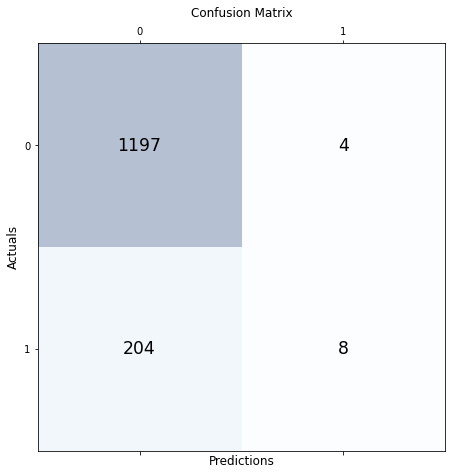

In [ ]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()
